# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [47]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [8,10]
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## 1. Data Cleaning

In [2]:
df = pd.read_csv('classification_lab_data.csv')

In [3]:
df = df.rename(columns={'default payment next month':'DEFAULT_NEXT'})

In [4]:
df["DEFAULT_NEXT"].mean()

0.22117588232843036

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,-0.285845,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,1.120903,1.193044,1.193515,1.168719,1.133016,1.150394,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# sorted(df["LIMIT_BAL"].unique())

In [7]:
# df["default payment next month"].mean()

In [8]:
# categories, accounts, defaults, ratio = [], [], [], []
# for category in list(range(df["AGE"].min(), df["AGE"].max()+1)):
#     categories.append(category)
#     accounts.append(df["AGE"][df["AGE"]==category].count())
#     defaults.append(df["default payment next month"][df["AGE"]==category].sum())
#     ratio.append(round(defaults[-1]/accounts[-1], 3))
# count_df = pd.DataFrame(list(zip(categories, accounts, defaults, ratio)), 
#                         columns=["age", "accounts", "defaults", "ratio"])
# count_df

In [9]:
# fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
# ax[0].bar(categories, np.subtract(accounts, defaults), width=0.8, label='accounts', bottom=defaults)
# ax[0].bar(categories, defaults, width=0.8, label='defaults')
# ax[0].set_ylabel("Defaults by Age")
# ax[0].set_xlabel("Age")
# ax[0].legend(loc="best")
# ax[1].bar(categories, ratio, width=0.8, label='ratio')
# ax[1].set_ylabel("Defaults/Accounts")
# ax[1].set_xlabel("Ratio")
# ax[1].legend(loc="best")
# fig.show()

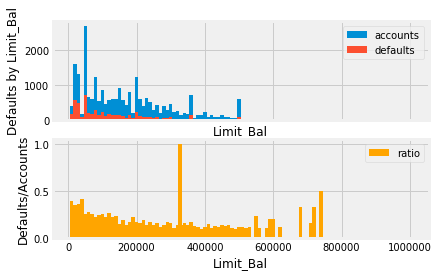

In [10]:
column_name = "LIMIT_BAL"

categories, accounts, defaults, ratio = [], [], [], []
for category in sorted(df["LIMIT_BAL"].unique()):
    categories.append(category)
    accounts.append(df[column_name][df[column_name]==category].count())
    defaults.append(df["DEFAULT_NEXT"][df[column_name]==category].sum())
    ratio.append(round(defaults[-1]/accounts[-1], 3))
count_df = pd.DataFrame(list(zip(categories, accounts, defaults, ratio)), 
                        columns=[column_name.lower(), "accounts", "defaults", "ratio"])
fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
ax[0].bar(categories, np.subtract(accounts, defaults), width=10000, label='accounts', bottom=defaults)
ax[0].bar(categories, defaults, width=10000, label='defaults')
ax[0].set_ylabel("Defaults by {}".format(column_name.title()))
ax[0].set_xlabel(column_name.title())
ax[0].legend(loc="best")
ax[1].bar(categories, ratio, width=10000, label='ratio', color="orange")
ax[1].set_ylabel("Defaults/Accounts")
ax[1].set_xlabel(column_name.title())
ax[1].legend(loc="best")
fig.show()

In [11]:
# Create a function that returns the dataframe with accounts and defaults for each category
def default_freq(column_name, df):
    categories, accounts, defaults, ratio = [], [], [], []
    for category in range(df[column_name].min(), df[column_name].max()+1):
        categories.append(category)
        accounts.append(df[column_name][df[column_name]==category].count())
        defaults.append(df["DEFAULT_NEXT"][df[column_name]==category].sum())
        ratio.append(round(defaults[-1]/accounts[-1], 3))
    count_df = pd.DataFrame(list(zip(categories, accounts, defaults, ratio)), 
                            columns=[column_name.lower(), "accounts", "defaults", "ratio"])
    fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
    ax[0].bar(categories, np.subtract(accounts, defaults), width=0.8, label='accounts', bottom=defaults)
    ax[0].bar(categories, defaults, width=0.8, label='defaults')
    ax[0].set_ylabel("Defaults by {}".format(column_name.title()))
    ax[0].set_xlabel(column_name.title())
    ax[0].legend(loc="best")
    ax[1].bar(categories, ratio, width=0.8, label='ratio', color="orange")
    ax[1].set_ylabel("Defaults/Accounts")
    ax[1].set_xlabel(column_name.title())
    ax[1].legend(loc="best")
    return count_df, fig, ax

,sex,accounts,defaults,ratio
0,male,9513,2298,0.242
1,female,14486,3010,0.208


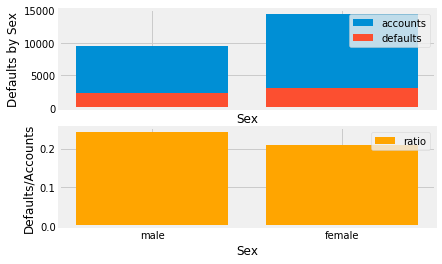

In [12]:
sex_freq, sex_fig, sex_ax = default_freq("SEX", df)
sexes = ["male", "female"]
plt.xticks([1,2], sexes)
sex_freq["sex"] = sexes
sex_freq

,education,accounts,defaults,ratio
0,wat,11,0,0.000
1,grad_school,8442,1616,0.191
2,college,11188,2656,0.237
3,high_school,3994,1012,0.253
4,other,100,5,0.050
5,huh,223,14,0.063
6,who,41,5,0.122


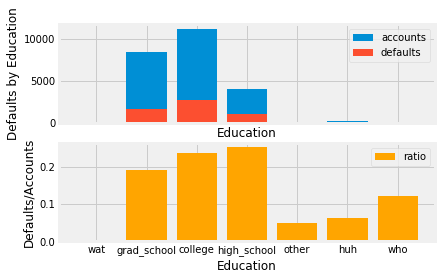

In [13]:
ed_freq, ed_fig, ed_ax = default_freq("EDUCATION", df)
eds = ["wat", "grad_school", "college", "high_school", "other", "huh", "who"]
plt.xticks(list(range(0,7)), eds)
ed_freq["education"] = eds
ed_freq

,marriage,accounts,defaults,ratio
0,wat,43,3,0.070
1,married,10958,2559,0.234
2,single,12735,2677,0.210
3,other,263,69,0.262


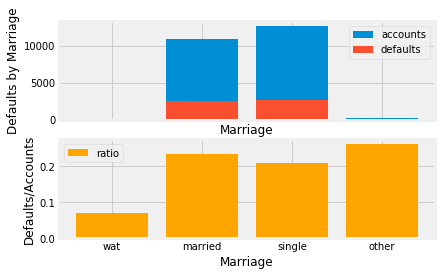

In [14]:
married_freq, married_fig, married_ax = default_freq("MARRIAGE", df)
married = ["wat", "married", "single", "other"]
plt.xticks([0,1,2,3], married)
married_freq["marriage"] = married
married_freq

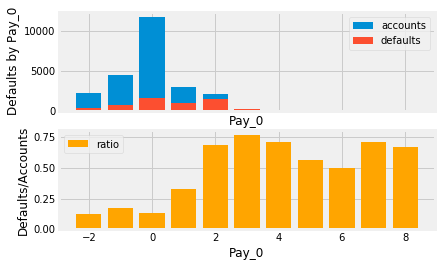

In [15]:
pay_0_freq, pay_0_fig, pay_0_ax = default_freq("PAY_0", df)

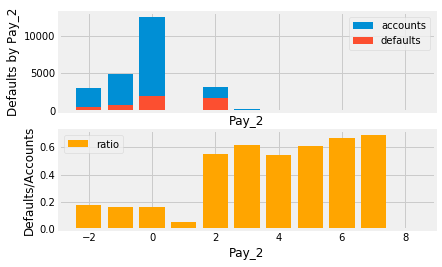

In [16]:
pay_2_freq, pay_2_fig, pay_2_ax = default_freq("PAY_2", df)

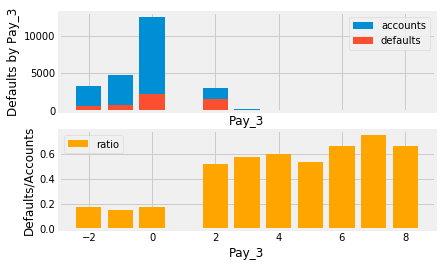

In [17]:
pay_3_freq, pay_3_fig, pay_3_ax = default_freq("PAY_3", df)

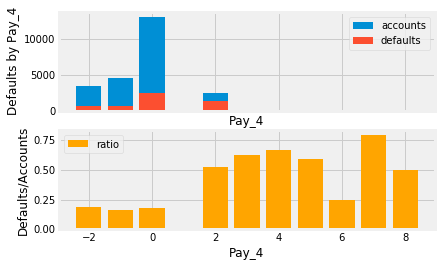

In [18]:
pay_4_freq, pay_4_fig, pay_4_ax = default_freq("PAY_4", df)

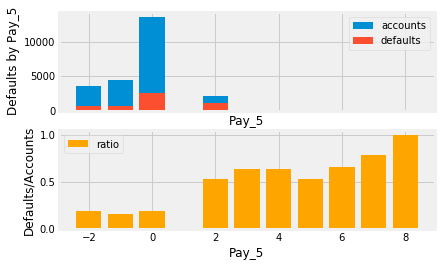

In [19]:
pay_5_freq, pay_5_fig, pay_5_ax = default_freq("PAY_5", df)

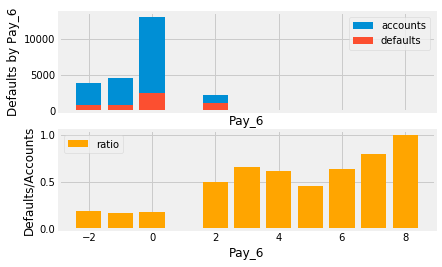

In [20]:
pay_6_freq, pay_6_fig, pay_6_ax = default_freq("PAY_6", df)

## 3. Feature Engineering

In [21]:
feat_df = df.copy()

pay_periods = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
for pay_period in pay_periods:
    feat_df[pay_period][feat_df[pay_period]<=0] = 0

In [22]:
feat_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,0.356057,0.317805,0.303888,0.259136,0.222343,0.227343,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,0.759705,0.798341,0.787083,0.762796,0.719335,0.719046,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


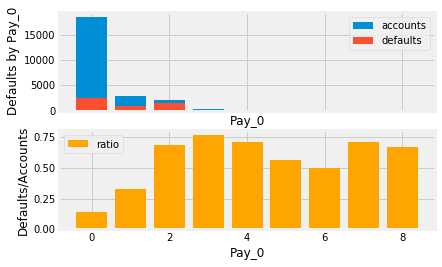

In [23]:
pay_0_freq, pay_0_fig, pay_0_ax = default_freq("PAY_0", feat_df)

In [24]:
for col1 in pay_periods:
    feat_df[col1] = feat_df[col1].astype("category").cat.as_ordered()

for col2 in ["SEX", "EDUCATION", "MARRIAGE"]:
    feat_df[col2] = feat_df[col2].astype("category").cat.as_unordered()


ed_dummy = pd.get_dummies(df["EDUCATION"], prefix="ED", drop_first=True)
marry_dummy = pd.get_dummies(df["MARRIAGE"], prefix="MARRY", drop_first=True)

feat_df = pd.concat([feat_df, ed_dummy, marry_dummy], axis=1)

feat_df.drop(["EDUCATION", "MARRIAGE"], axis=1, inplace=True)
feat_df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3
0,50000,1,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,0,1,0,0,0,0,0,1,0
1,30000,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,0,1,0,0,0,0,1,0,0
2,260000,1,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,1,0,0,0,0,0,0,1,0
3,200000,2,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,0,1,0,0,0,0,1,0,0
4,50000,1,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,1,0,0,0,0,0,0,1,0


In [29]:
ed_dummy = pd.get_dummies(df["EDUCATION"], prefix="ED", drop_first=True)
marry_dummy = pd.get_dummies(df["MARRIAGE"], prefix="MARRY", drop_first=True)

feat_df = pd.concat([feat_df, ed_dummy, marry_dummy], axis=1)

#feat_df.drop(["EDUCATION", "MARRIAGE"], axis=1, inplace=True)
feat_df.head()
feat_df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3
count,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,35.523230,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176,0.351765,0.466186,0.166424,0.004167,0.009292,0.001708,0.456602,0.530647,0.010959,0.351765,0.466186,0.166424,0.004167,0.009292,0.001708,0.456602,0.530647,0.010959,0.351765,0.466186,0.166424,0.004167,0.009292,0.001708,0.456602,0.530647,0.010959
std,129915.115993,9.253986,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047,0.477531,0.498866,0.372468,0.064418,0.095948,0.041298,0.498123,0.499070,0.104111,0.477531,0.498866,0.372468,0.064418,0.095948,0.041298,0.498123,0.499070,0.104111,0.477531,0.498866,0.372468,0.064418,0.095948,0.041298,0.498123,0.499070,0.104111
min,10000.000000,21.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,42.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
continuous_factors = pd.DataFrame([])
categorical_factors = pd.DataFrame([])

for col in list(feat_df):
    if col.startswith('BILL') or col.startswith('PAY_AMT') or col.startswith('AGE') or col == 'LIMIT_BAL':
        continuous_factors = pd.concat([continuous_factors, feat_df[col]], axis=1)
    else:
        categorical_factors = pd.concat([categorical_factors, feat_df[col]], axis=1)
        
continuous_columns = continuous_factors.columns
categorical_columns = categorical_factors.drop("DEFAULT_NEXT", axis=1).columns

In [31]:
feat_df.dtypes

LIMIT_BAL          int64
SEX             category
AGE                int64
PAY_0           category
PAY_2           category
PAY_3           category
PAY_4           category
PAY_5           category
PAY_6           category
BILL_AMT1          int64
BILL_AMT2          int64
BILL_AMT3          int64
BILL_AMT4          int64
BILL_AMT5          int64
BILL_AMT6          int64
PAY_AMT1           int64
PAY_AMT2           int64
PAY_AMT3           int64
PAY_AMT4           int64
PAY_AMT5           int64
PAY_AMT6           int64
DEFAULT_NEXT       int64
ED_1               uint8
ED_2               uint8
ED_3               uint8
ED_4               uint8
ED_5               uint8
ED_6               uint8
MARRY_1            uint8
MARRY_2            uint8
MARRY_3            uint8
ED_1               uint8
ED_2               uint8
ED_3               uint8
ED_4               uint8
ED_5               uint8
ED_6               uint8
MARRY_1            uint8
MARRY_2            uint8
MARRY_3            uint8


In [32]:
pct_balance = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'])/df['LIMIT_BAL']

In [33]:
feat_df["PCT_BAL"] = pct_balance

In [34]:
# age_grad = np.multiply(feat_df["AGE"], feat_df["ED_1"])
# age_college = np.multiply(feat_df["AGE"], feat_df["ED_2"])

# feat_df["AGE_GRAD"] = age_grad
# feat_df["AGE_COLLEGE"] = age_college

In [35]:
within_1std_age = df['AGE'].apply(lambda x: 1 if df['AGE'].mean()-df['AGE'].std() < x < df['AGE'].mean()+df['AGE'].std() else 0)

In [36]:
#age_grad = np.multiply(within_1std_age, feat_df["ED_1"])
#age_college = np.multiply(within_1std_age, feat_df["ED_2"])

#feat_df["AGE_GRAD"] = age_grad
#feat_df["AGE_COLLEGE"] = age_college

In [37]:
feat_df["AGE_1STD"] = within_1std_age

In [28]:
feat_df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3
0,50000,1,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,30000,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,260000,1,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,200000,2,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,50000,1,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [38]:
# function to reduce annoyance
def TTS_with_colnames(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)
    allcols = []
    for col in X_train.columns:
        allcols.append(col)
    allcols.append(y_train.name)
    
    training  = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
    training.columns = allcols
    return X_train, X_test, y_train, y_test, training

In [39]:
# Train Test Split
# Create matrix of features
X = feat_df.drop('DEFAULT_NEXT', axis = 1) # grabs everything else 
# Create target variable
y = feat_df['DEFAULT_NEXT'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns


In [40]:
# Logistic regression

X_train, X_test, y_train, y_test, training = TTS_with_colnames(X, y)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
y_pred_test = lr_clf.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

Test Accuracy score:  0.8223333333333334
Test F1 score:  0.46806387225548907


In [41]:
training.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ED_1,ED_2,ED_3,ED_4,...,ED_6,MARRY_1,MARRY_2,MARRY_3,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3,PCT_BAL,AGE_1STD,DEFAULT_NEXT
21680,230000,2,36,0,0,0,0,0,0,4390,1402,3665,929,4167,115126,1402,3665,929,4167,115126,5000,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.563822,1,0
18718,50000,1,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0.000000,0,1
20318,60000,2,41,0,0,0,0,0,0,34632,35654,36991,37701,38452,39255,1600,1915,1625,1376,1422,1435,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,3.711417,1,1
15219,310000,1,42,0,0,0,0,0,0,2647,4206,1858,3057,2538,3069,4206,1858,3057,2538,3069,6591,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.056048,1,1
23837,340000,2,25,1,0,0,0,0,0,0,0,0,1888,4777,4752,0,0,1888,4777,4752,1888,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.033579,0,0


In [42]:
#Set up logistic regression with cross-validation using liblinear.
#Cs sets the inverse of the regularization strength, which will be optimized
#through cross-validation. Uses the default Stratified K-Folds
#CV generator, with 3 folds.
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(penalty='l1', solver='saga', cv=5)
model_cv.fit(X_train, y_train)
columns = np.arange(X_train.shape[1])[~np.isclose(model_cv.coef_.ravel(), 0)]
columns 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 15, 16, 17, 18, 19, 20, 24,
       25, 26, 27, 29, 33, 34, 35, 36, 38, 42, 43, 44, 45, 47, 49])

In [43]:
# separate minority and majority classes
no_default = training[training.DEFAULT_NEXT==0]
default = training[training.DEFAULT_NEXT==1]

# Get a class count to understand the class imbalance.
print('Default count: '+ str(len(default)))
print('Paid count: '+ str(len(no_default)))

Default count: 3982
Paid count: 14017


In [46]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(9, 25, 2))
for k in k_range:
    # instantiate the model (using a different value fopr K)
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit the model with data
    knn.fit(X_train, y_train)
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)    
    #fit the model and get the score on a evaluation metric
    accuracy = metrics.accuracy_score(y_pred_class, y_test)
    F1 = metrics.f1_score(y_pred_class, y_test)
    k_scores.append({k : (accuracy, F1)})
    print('k = ' + str(k) + ' Accuracy:' + str(metrics.accuracy_score(y_pred_class, y_test)))
    print('k = ' + str(k) + ' F1: ' + str(metrics.f1_score(y_pred_class, y_test)))
    print()

# Print out the scores to see which one is best. 

NameError: name 'metrics' is not defined

In [48]:
#KNN
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.8085
F1: 0.4364884747425208


In [49]:
#Upsample minority
from sklearn.utils import resample
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(no_default), # match number in majority class
                          random_state=11) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([no_default, default_upsampled])

# check new class counts
upsampled.DEFAULT_NEXT.value_counts()

# trying logistic regression again with the balanced dataset
y_train_up = upsampled.DEFAULT_NEXT
X_train_up = upsampled.drop('DEFAULT_NEXT', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train_up, y_train_up)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))

Test Accuracy score:  0.768
Test F1 score:  0.5232876712328767


## 6. Model Evaluation

## 7. Final Model